Import Neccessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import shutil
import random

Data Parameters

In [3]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10 
Split_ratio = (0.8, 0.1,0.1)
SEED = 42  # For reproducibility

Data Loading and Splitting

In [4]:
original_dataset_dir =  r"C:\Users\user\Downloads\CTS_Datasets\Datasets"  # path to your original folder

print("🔍 ORIGINAL DATASET CHECK")
for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        print(f'{class_name}: {num_images} images')


🔍 ORIGINAL DATASET CHECK
Grade A: 1085 images
Grade B: 1005 images
Impurities: 34 images


In [5]:
#Load the dataset 
base_dir = 'split_dataset' #New folder to splt train, val nd test set

# Create split folders
for split in ['train', 'validation', 'test']:
    for class_name in os.listdir(original_dataset_dir):
        os.makedirs(os.path.join(base_dir, split, class_name), exist_ok=True)

# Split and copy files for each class
for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    train_split = int(Split_ratio[0] * len(images))
    val_split = int(Split_ratio[1] * len(images)) + train_split

    train_file = images[:train_split]
    val_file = images[train_split:val_split]
    test_file = images[val_split:]

    
    for split, file_list in zip(['train', 'validation', 'test'],
                                [train_file, val_file, test_file]):
        for filename in file_list:
            src = os.path.join(class_path, filename)
            dst = os.path.join(base_dir, split, class_name, filename)
            shutil.copyfile(src, dst)

print(' Data has been split successfully.')


 Data has been split successfully.


In [6]:
# To confirm number of images in each file

base_dir = 'split_dataset' 

# To confirm number of images in each split and class
for split in ['train', 'validation', 'test']:
    print(f'\n{split.upper()} SET')
    
    split_path = os.path.join(base_dir, split)
    
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        num_images = len(os.listdir(class_path))
        print(f'{class_name}: {num_images} images')


TRAIN SET
Grade A: 1042 images
Grade B: 969 images
Impurities: 33 images

VALIDATION SET
Grade A: 204 images
Grade B: 191 images
Impurities: 7 images

TEST SET
Grade A: 206 images
Grade B: 192 images
Impurities: 11 images


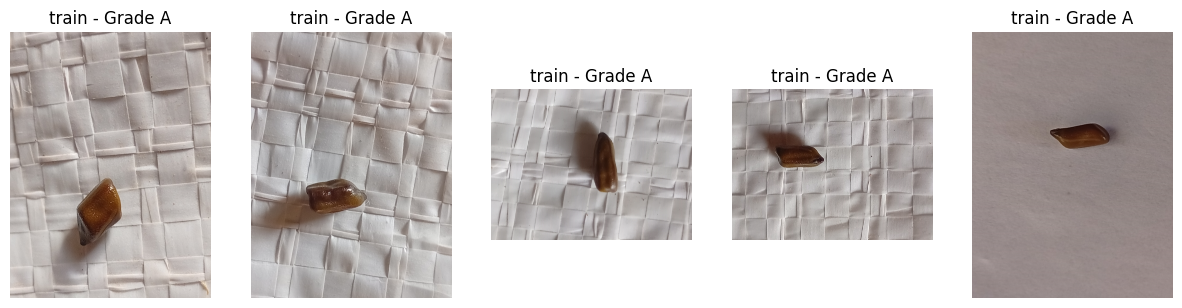

In [7]:
# Display sample images from a Grade A class in train split
def show_sample_images(base_dir='split_dataset', split='train', class_name='Grade A', num_images=5):
    class_dir = os.path.join(base_dir, split, class_name)
    images = os.listdir(class_dir)
    
    if len(images) == 0:
        print(f"No images found in {class_dir}")
        return

    sample_images = random.sample(images, min(num_images, len(images)))

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(sample_images):
        img_path = os.path.join(class_dir, image_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f'{split} - {class_name}')
        plt.axis('off')
    plt.show()

show_sample_images(split='train', class_name='Grade A')


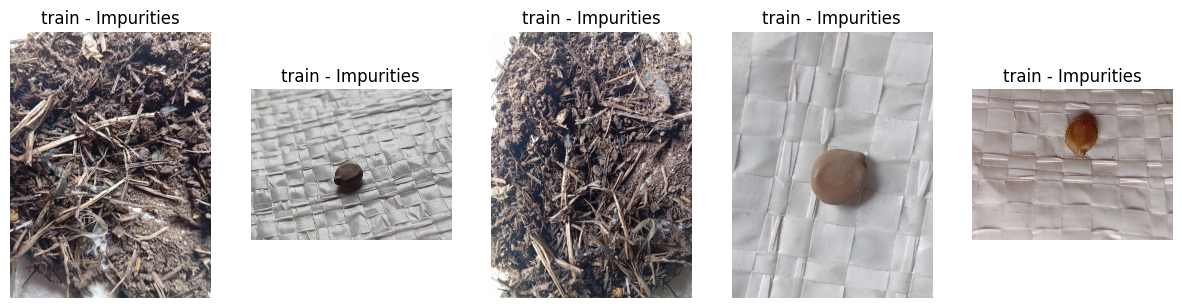

In [8]:
# Display sample images from Impurities class in train split
def show_sample_images(base_dir='split_dataset', split='train', class_name='Impurities', num_images=5):
    class_dir = os.path.join(base_dir, split, class_name)
    images = os.listdir(class_dir)
    
    if len(images) == 0:
        print(f"No images found in {class_dir}")
        return

    sample_images = random.sample(images, min(num_images, len(images)))

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(sample_images):
        img_path = os.path.join(class_dir, image_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f'{split} - {class_name}')
        plt.axis('off')
    plt.show()

show_sample_images(split='train', class_name='Impurities')


In [ ]:
# Display sample images from Gclass in train split
def show_sample_images(base_dir='split_dataset', split='train', class_name='Grade A', num_images=5):
    class_dir = os.path.join(base_dir, split, class_name)
    images = os.listdir(class_dir)
    
    if len(images) == 0:
        print(f"No images found in {class_dir}")
        return

    sample_images = random.sample(images, min(num_images, len(images)))

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(sample_images):
        img_path = os.path.join(class_dir, image_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f'{split} - {class_name}')
        plt.axis('off')
    plt.show()

show_sample_images(split='train', class_name='Grade A')
